# Homework 8

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date:** Saturday, November 3rd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

** Place the name of everyone who's submitting this assignment here**

<div class="answer-separator">
------------------------
</div>

In [1]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

import pandas as pd
import seaborn as sns

%matplotlib inline

## Question 1: In the AM207 Nursery We Help Canadians Smoke Trees with Purple Stuff

**Some coding required**

**This is part 1 of a 2 part problem.  You'll see the second part in a later problem set...**

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 

$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$

where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:

$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$

Unfortunately, the geneticist was unable to specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:

$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4} $$


The nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy EM based maximum-likelihood finding and sampling (which you will do in next week's homework).

They augment the data with a new variable $z$ such that:

$$z + (y_1 - z) = y_1.$$

That is, using the latent variable $z$, the number of type I child plants $y_1$ can be broken into two subtypes. Let the probability of obtaining the two subtype be $1/2$ and $\theta/4$, respectively. $y_1$ can now be interpreted as to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as

$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Treat the augmented model as a latent variable model.

Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

1.1. The observed data log likelihood $\mathcal{l}(y \ \vert \ \theta)$

1.2. The complete data log likelihood $\mathcal{L}(y, z\ \vert \ \theta)$

1.3. The Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete data log likelihood, defined by

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)]$$

1.4. Find an expression for $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$ by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$ given $\theta, \theta^{t-1}$ to find the optimal value for $\theta^{t}$.  

**Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

1.5. Use your forumulas from 1.3 and 1.4 for $Q(\theta, \theta^{t-1})$ and $\theta^{t}$ to calculate the maximum likelihood through Expectation Maximization (EM). In order to perform EM, you must iterate through the following steps

- (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

Choose your own reasonable criterion for convergence to **estimate the MLE** of $\theta$ using EM.




**Gratuitous Titular Reference**:  Canada recently became the second country in the world to [legalize marijuana](https://www.cnn.com/2018/06/20/health/canada-legalizes-marijuana/index.html).  [Purple Stuff](https://www.amazon.com/Purple-Stuff-Soda-Relaxation-Beverage/dp/B00FF4AXTE) is a health beverage available on Amazon with a name and taste that's a tip of the hat to [Purple Drank](https://en.wikipedia.org/wiki/Purple_drank), the codeine infused beverage also popularly known as *lean* and is synonymous with the Houston hip hop scene (and in particular DJ Screw and his famous Chopped and Screwed style).

First of all, note that the condition for applying the EM algorithm is satisfied:

$$ 
\sum_{z=0}^{y_1}{y_1\choose z} \left(\frac{1}{2}\right)^{y_1-z} \left(\frac{\theta}{4}\right)^z = \left(\frac{1}{2} + \frac{\theta}{4}\right)^{y_1} = \left(\frac{\theta + 2}{4}\right)^{y_1}
$$

by the binomial theorem. Using this, it's clear that $\sum_z p(y, z\vert \theta) = p(y\vert \theta)$.

> 1.1. The observed data log likelihood $\mathcal{l}(y \ \vert \ \theta)$

$$
l(y \vert \theta) = y_1 \log\left(2 + \theta \right) + (y_2 + y_3) \log\left(1 - \theta \right) + y_4 \log \theta
$$

> 1.2. The complete data log likelihood $\mathcal{L}(y, z\ \vert \ \theta)$

$$
\mathcal{L}(y, z\ \vert \ \theta) = \log y_1 ! - \log z! - \log(y_1-z)! + \left(y_1 - z \right) \log\left(\frac{1}{2}\right) + z \log\left(\frac{\theta}{4}\right) + (y_2 + y_3) \log\left(1 - \theta \right) + y_4 \log \theta
$$

> 1.3. The Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete data log likelihood, defined by

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)]$$

To calculate the auxiliary function, we first need to calculate the posterior $p(z\vert y, \theta)^{t-1}$. This is easy to do using the definition of conditional probability:

$$
p(z\vert y, \theta) = \frac{p(z,y)\vert \theta}{p(y\vert \theta)} = \frac{{y\choose z} (\frac{1}{2})^{y-z}(\frac{\theta}{4})^z(1-\theta)^{y_2 + y_3} \theta^{y_4}}{(\frac{2 + \theta}{4})^y(1-\theta)^{y_2 + y_3} \theta^{y_4}} = \frac{{y\choose z} (\frac{1}{2})^{y-z}(\frac{\theta}{4})^z}{(\frac{2 + \theta}{4})^y}
$$

It's easy to show that this is a binomial distribuion again with $p=\frac{\frac{1}{2}}{\frac{2 + \theta}{4}} = \frac{2}{2 + \theta}$. This follows from the following calcuation:
$$
p(k\vert n, a, b) = {n \choose k}\frac{a^{n-k}b^k}{(a+b)^n} = {n\choose k}\left(\frac{a}{a+b}\right)^{n-k}\left(\frac{b}{a+b}\right)^k \:.
$$

Now we can use this to calculate the auxilary function, but we only have to care about terms including $\theta$ (also, it is important to distinguish $\theta$ and $\theta^{t-1}$ and that cost some time).

$$
\mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)] = \\
= \mathbb E_Z (z) \log \theta + (y_2 + y_3) \log(1 - \theta) + y_4 \log \theta + \text{const} = \\
= y_1 \frac{\theta^{t-1}}{\theta^{t-1}+2} \log \theta+  (y_2 + y_3) \log(1 - \theta) + y_4 \log \theta + \text{const} = \\
= (y_1 \frac{\theta^{t-1}}{\theta^{t-1}+2} + y_4) \log \theta + (y_2 + y_3) \log(1 - \theta) + \text{const}
$$


> 1.4. Find an expression for $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$ by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$ given $\theta, \theta^{t-1}$ to find the optimal value for $\theta^{t}$.  

> **Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

Now, this term looks similar to the log-likeihood of a binomial and we know how to optimize it:

$$
\theta^t = \arg\max_\theta \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)]  =\frac{y_1\frac{\theta^{t-1}}{\theta^{t-1}+2} + y_4}{y_1\frac{\theta^{t-1}}{\theta^{t-1}+2} + y_4 + y_2 + y_3}
$$

> 1.5. Use your forumulas from 1.3 and 1.4 for $Q(\theta, \theta^{t-1})$ and $\theta^{t}$ to calculate the maximum likelihood through Expectation Maximization (EM). In order to perform EM, you must iterate through the following steps

> - (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

> Choose your own reasonable criterion for convergence to **estimate the MLE** of $\theta$ using EM.

From the formula above, we can actually easily perform both the E-step and the M-step in one:

In [414]:
y = np.array([125, 18, 20, 34])
eps = 1e-6

def check_convergence(thetas, epsilon=1e-6):
    """
    Check convergence. Conergence is reached if the relative change in theta is less than epsilon.
    
    :param thetas: array of theta value
    :param epsilon: relative change in theta necessary to define convergence
    """
    if len(thetas) < 2:
        return False
    elif (thetas[-1] - thetas[-2]) / thetas[-2] > epsilon:
        return False
    elif (thetas[-1] - thetas[-2]) / thetas[-2] <= epsilon:
        return True
    else:
        print("Something went wrong")

def em(y, theta_init=1.0/len(y), epsilon=eps):
    """
    Perform EM algorithm
    
    :param y: data
    :param theta_init: initial value of theta
    :param epsilon: convergence threshold
    """
    thetas = [theta_init]
    
    while not check_convergence(thetas, epsilon):
        theta_old = thetas[-1]
        theta_factor = theta_old / (theta_old + 2)
        theta_new = (theta_factor * y[0] + y[3]) / (theta_factor * y[0] + y[3] + y[1] + y[2])
        thetas.append(theta_new)
    
    return thetas

theta_sequence = em(y)
print("Theta sequence:\n", theta_sequence)
print("Best theta: {:.3f}".format(theta_sequence[-1]))

Theta sequence:
 [0.25, 0.5575679172056921, 0.6171318781565496, 0.6255256750047308, 0.6266492757889837, 0.6267986275401303, 0.626818461126261, 0.6268210946549618, 0.6268214443324539]
Best theta: 0.627


<div class="answer-separator">
------------------------
</div>

## Question 2: Predicting the Prior Like a Punch to the Kidneys 

**Some coding required**

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

2.1. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet. And, our data are on the scale of $y$, not the rates $\theta$. Write an expression for the negative binomial prior-predictive for this model.

**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.

2.2. Implement Empirical Bayes via moment matching by matching the mean and the variance (central moments) of the negative binomial you calclated in 2.1 to the sample mean and variance from the data.  Find appropriate expressions/values for $\alpha$ and $\beta$. 

**Hint:** You need to be careful with the $5n_j$ multiplier.

2.3. Use the values of $\alpha$ and $\beta$ you derived in 2.2 to generate 5000 posterior samples for the kidney cancer rates for each county.  Use these samples to generate a posterior mean rate for each county.

2.4. Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

2.5. Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

**Hint:** You might also find it helpful to follow the Rat Tumor example.


**Gratuitous Pop Culture Bayesian Reference**: 

![](https://www.explainxkcd.com/wiki/images/b/bd/modified_bayes_theorem.png)

> 2.1. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet. And, our data are on the scale of $y$, not the rates $\theta$. Write an expression for the negative binomial prior-predictive for this model.

> **Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.

The prior predictive distribution is a [negative binomial](https://en.wikipedia.org/wiki/Conjugate_prior). So we just have to find out its parameters. 

From Wikipedia, we know the relation $\beta = \frac{1-p}{p}$, $\alpha = r$, where $(r, p)$ are the parameteres of the binomial and $(\alpha, \beta)$ the parameters of the Gamma.

Furthermore, note that $5n_j \theta$ follows a Gamma with rate parameter $\frac{\beta}{5n_j}$.

Thus $p = \frac{1}{1 + \frac{\beta}{5n_j}} = \frac{5n_j}{5n_j + \beta}$.

> 2.2. Implement Empirical Bayes via moment matching by matching the mean and the variance (central moments) of the negative binomial you calclated in 2.1 to the sample mean and variance from the data.  Find appropriate expressions/values for $\alpha$ and $\beta$. 

> **Hint:** You need to be careful with the $5n_j$ multiplier.

The prior predictive distribution is a [negative binomial](https://en.wikipedia.org/wiki/Conjugate_prior). So we just have to find out its parameters. 

From Wikipedia, we know the relation $\beta = \frac{1-p}{p}$, $\alpha = r$, where $(r, p)$ are the parameteres of the binomial and $(\alpha, \beta)$ the parameters of the Gamma.

Furthermore, note that $5n_j \theta$ follows a Gamma with rate parameter $\frac{\beta}{5n_j}$.

Thus $p = \frac{1}{1 + \frac{\beta}{5n_j}} = \frac{5n_j}{5n_j + \beta}$.

Using the mean value of the negative binomial, it is easy to calculate the expected number of deaths as

$$
5n_i \frac{\alpha}{\beta}
$$

and thus the expected frequency as

$$
\frac{\alpha}{\beta} \:.
$$

Once we have the expected frequency, it is easy to calculate the variance for each county:

$$
\text{Var}(y_i) = \frac{\mu_i}{1-\frac{5n_i}{5n_i+\beta}} = \frac{\mu_i(5n_i + \beta)}{\beta}
$$

and thus

$$
\text{Var}\left(\frac{y_i}{n_i}\right) = \frac{\alpha}{\beta}\left(\frac{5}{\beta} + \frac{1}{n_i}\right) \:.
$$

Now, we assume a constant variance for the rates and use a [pooled variance](https://en.wikipedia.org/wiki/Pooled_variance) to estimate it:

$$
s_P = \frac{\sum_{i=1}^{n_{county}} (n_i - 1) (\frac{5}{\beta} + \frac{1}{n_i})}{pop_{tot} - n_{county}} \approx \\
\approx \frac{(pop_{tot} - n_{county} )\frac{5}{\beta} + n_{county}}{pop_{tot} - n_{county}} \approx \frac{5}{\beta}
$$

In [2]:
cancer = pd.read_csv("../data/kcancer.csv")
cancer['n_deaths'] = cancer['pop'] * cancer['pct_mortality']

In [3]:
beta = 5 / cancer['pct_mortality'].std()
alpha = cancer['pct_mortality'].mean() * beta
alpha, beta

(5.754035882663991, 99438.06830985718)

In [4]:
cancer['alpha_posterior'] = cancer['n_deaths'] + alpha
cancer['beta_posterior'] = cancer['pop'] + beta
cancer['posterior_mean_exact'] = cancer['alpha_posterior'] / cancer['beta_posterior']
cancer.head()

,state,fips,county,countyfips,dc,pop,pct_mortality,n_deaths,alpha_posterior,beta_posterior,posterior_mean_exact
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015,1.0,6.754036,164353.06831,0.000041
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077,15.0,20.754036,294691.06831,0.000070
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029,1.0,6.754036,133425.06831,0.000051
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032,1.0,6.754036,130613.06831,0.000052
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055,5.0,10.754036,190985.06831,0.000056


> 2.3. Use the values of $\alpha$ and $\beta$ you derived in 2.2 to generate 5000 posterior samples for the kidney cancer rates for each county.  Use these samples to generate a posterior mean rate for each county.

In [5]:
posterior_rates_unscaled = scipy.stats.gamma.rvs(a=cancer['alpha_posterior'], scale=1/cancer['beta_posterior'], size=((5000, cancer.shape[0])))
poisson_rates = posterior_rates_unscaled * cancer['pop'].values.reshape(1, cancer.shape[0]) * 5
deaths = scipy.stats.poisson.rvs(poisson_rates)
death_rates = deaths / (cancer['pop'].values.reshape(1, cancer.shape[0]) * 5)
cancer['posterior_mean_pp'] = death_rates.mean(axis=0)
cancer.head()

,state,fips,county,countyfips,dc,pop,pct_mortality,n_deaths,alpha_posterior,beta_posterior,posterior_mean_exact,posterior_mean_pp
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015,1.0,6.754036,164353.06831,0.000041,0.000041
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077,15.0,20.754036,294691.06831,0.000070,0.000071
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029,1.0,6.754036,133425.06831,0.000051,0.000051
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032,1.0,6.754036,130613.06831,0.000052,0.000052
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055,5.0,10.754036,190985.06831,0.000056,0.000056


> 2.4. Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

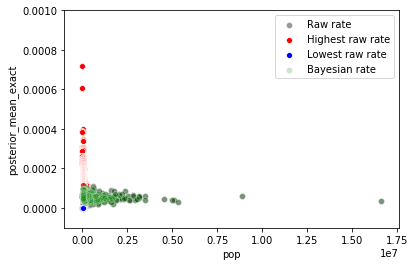

In [29]:
g = sns.scatterplot(x="pop", y="pct_mortality", data=cancer, color='black', alpha=.4, label='Raw rate')
g.set(ylim=(-0.0001, 0.001))
sns.scatterplot(data=cancer.nlargest(300, 'pct_mortality'), x='pop', y='pct_mortality', color='red', label='Highest raw rate')
sns.scatterplot(data=cancer.nsmallest(300, 'pct_mortality'), x='pop', y='pct_mortality', color='blue', label='Lowest raw rate')
sns.scatterplot(data=cancer, x='pop', y='posterior_mean_exact', color='green', label='Bayesian rate', alpha=.2)



> 2.5. Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

> **Hint:** You might also find it helpful to follow the Rat Tumor example.

The Bayesian rates are preferable to study the rates for a few reasons:

1. Inference on the lowest and highest rates actually makes sense. We saw in the plot above that these values are only driven by small counties using the maximum likelihood rates.
2. When we want to use the rates as input to further analysis (e.g. determine what causes high cancer rates), this is hard with raw rates. Once we apply regularization, the rates make more sense (especially if the subsequent analysis also uses Bayesian methods and can handle samples from the posterior rates).
3. The Bayesian analysis captures our intuitive understanding that small counties do not provide much evidence and should be ignored (see plot below)

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


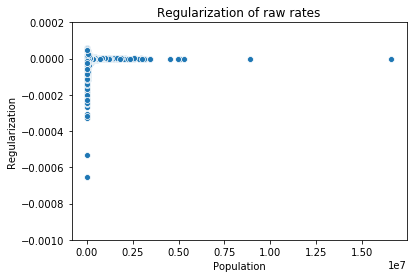

In [57]:
cancer['regularization'] = cancer['posterior_mean_exact'] - cancer['pct_mortality']
g = sns.scatterplot('pop', 'regularization', data=cancer)
g.set(ylim=(-0.001, 0.0002))
g.set(xlabel="Population", ylabel="Regularization")
g.set_title("Regularization of raw rates")
plt.legend()

<div class="answer-separator">
------------------------
</div>

## Q2: Martin Garrix, Tiesto, Marshmello on the 1s and 2s.  Is that a Mixture of Experts?

**Some coding required**

What if you had to predict a one-to-many function? The data provided below comes from a dataset generated by Chris Bishop (yes that Bishop) to explain the models mentioned in the title above. We have included a pdf from his book which describe these models in some detail. This problem will continure in future homework where we shall learn to sample from this model and also how to solve it using mixture density networks.

We read this data in...

In [2]:
df = pd.read_csv("../data/one-to-many.csv")
df.head()

,target,x
0,0.000000,0.018727
1,0.001001,0.050424
2,0.002002,0.042375
3,0.003003,0.038596
4,0.004004,0.019352


...and then plot it. Notice both the uneven sampling (more towards the center), and the "more than one y" for a given x.

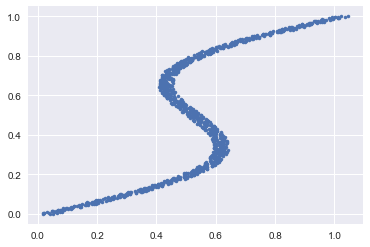

In [3]:
plt.plot(df.x, df.target, '.');

Normal regression approaches to modeling such a function wont work, as they expect the function to be a proper mathematical function, that is, single valued.

These kind of problems are called **inverse problems**, where more than one input state leads to an output state, and we have to try and model these multiple input states.

A mixture of gaussians (or other distributions) might is a sensible way to do this.

You choose one of the gaussians with some probability. The nean of the gaussian is then given by some regression function, say for example a straight line. We could additionally fix the standard deviation or model it as well. 

Thus, for each component Gaussian, we choose a functional form for the mean and standard deviation. So our model looks something like this:

$$f(x)  = \sum_i \lambda_i g_i (x) $$

Say we fit a model with 3 gaussians to this data. Such a model cannot fit the function above. Notice for example that at $x=0.2$ only one of the gaussians will dominate, different from the situation at $x=0.5$. This means that the probabilities of "belonging" to one or the other gaussians is also changing with $x$.

If we allow the mixing probabilities to depend on $x$, we can model this situation.

$$f(x)  = \sum_i \lambda_i (x) g_i (x) $$

Such a model is called a "mixture of experts" model. The idea is that one "expert" gaussian is responsible in one sector of the feature space, while another expert is responsible in another sector.

You can think of this model as implementing a "standard" gaussian mixture at each "point" x, with the added complexity that all of the means, standard deviations, and mixture probabilities change from one x to another.

See https://www.cs.toronto.edu/~hinton/absps/hme.pdf and http://www.ee.hacettepe.edu.tr/~eyuksel/Publications/2012_TwentyYearsofMixtureofExperts.pdf for more details. I found the latter clearer and easier to understand.

For this entire question you might find diagram code from [here](https://github.com/hardmaru/pytorch_notebooks/blob/master/mixture_density_networks.ipynb) useful. Take with attribution.

We will assume we have **3 gaussians**.

### Iterative Linear Regression Mixture of Experts Model

The basic idea, illustrated below, is to fit piecewise linear regressions iteratively in a EM style algorithm.

![](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjnsuyq59tar%2Fmixreg0.png)

The algorithm looks like this: 

- Initialize the 1000 points in this dataset as randomly belonging to one of 3 "classes" or "clusters" or "experts". This takes a x-data problem and augments it with a fake z data point that tells us whether the point belongs in cluster 0, 1, or 2. (It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2).

- With the fake z's in hand the 1000 points can be separated (based on cluster assignment) into 3 sets of points and used to fit 3 linear regression models. 

- Predictions can be made for all 1000 points on the data for each of the 3 regression lines. Reassign each data point to a cluster by choosing the cluster that minimizes the prediction error based on the squared distances between its actual y value and the 3 cluster predictions.

- Rinse and repeat.

3.1. We stated that "*It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2*".  Why might it help convergence to define an initial cluster assignment as opposed to random assignment?

3.2. Specify a potential convergence criterion to use.  Why might you choose it?

3.3. Implement the algorithm we described along with the convergence criterion you chose in 3.2.  You can use a linear regression fitter of your choice (statsmodels, sklearn, your own...).

3.4. Apply your algorithm in the data in the `df` dataframe to produce a diagram like the one above which illustrates the straight line fits as well as the cluster belonging. 


**Note for those who want to read more** The mixture of experts can be implemented using Expectation Maximization using iteratively-reweighted least squares. Our method in A was merely an approximation to this process. You can find update equations [here](https://people.eecs.berkeley.edu/~jordan/papers/jordan-xu.ps)

**Gratuitous Titular Reference**:  [DJs](https://martingarrix.com/), [DJs](https://www.tiesto.com/), [DJs](https://marshmellomusic.com/).

> 3.1. We stated that "*It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2*".  Why might it help convergence to define an initial cluster assignment as opposed to random assignment?

The EM algorithm generally finds a **local maximum** of the likelihood only. Now, in the problem at hand, we have a fairly good intuition about how the desired solution should look like: points on the left should be in one cluster, points on the right in another and points in the middle can belong to either of the three.

By putting this structure in the initilization we nudge the algorithm towards this desired outcome.

> 3.2. Specify a potential convergence criterion to use.  Why might you choose it?

The convergence criterion we use is that the residual sum of squares between two iteration does not improve more than $\epsilon$ percent. 

One reason to choose it, is that the residual sum of squares is a standard performance measure for regression problem.

We actually suspect that the algorithm can be put in the context of the EM algorithm, in which case the residual sum of squares would correspond to the negative log likelihood (up to unimportant constants). Writing it as an EM algorithm would follow along the lines of writing K-means as EM algorithm (see e.g. [here](https://www.coursera.org/learn/bayesian-methods-in-machine-learning)).

> 3.3. Implement the algorithm we described along with the convergence criterion you chose in 3.2.  You can use a linear regression fitter of your choice (statsmodels, sklearn, your own...).

In [283]:
from sklearn.linear_model import LinearRegression

class expertMixutre():
    """
    Implements a mixture of experts model
    """
    def __init__(self, df, target, predictor, n_cluster, eps=0.001):
        self.data = df
        self.n_data = df.shape[0]
        self.target = target
        self.predictor = predictor
        self.n_cluster = n_cluster
        self.rss = []
        self.eps = eps
    
    def initialize_cluster_(self, cluster=np.empty(0)):
        if len(cluster) > 0:
            self.cluster = cluster
        else:
            cluster = np.random.randint(high=self.n_cluster, size=self.n_data)
    
    def E_step(self):
        """
        Fit best linear model to cluster assignment.
        """
        self.experts = {}
        data_grouped = self.data.groupby(self.cluster)
        for cluster, data_cluster in data_grouped:
            self.experts[cluster] = LinearRegression().fit(data_cluster[['x']], data_cluster['target'])
    
    def M_step(self):
        preds = np.empty((self.n_data, self.n_cluster))
        for i, expert in self.experts.items():
            preds[:, i] = expert.predict(self.data[[self.predictor]])
            
        resids = preds - self.data.target.reshape((self.n_data, 1))
        resids_sq = resids ** 2
        best_cluster = np.argmin(resids_sq, 1)
        self.cluster = best_cluster
    
    def calc_rss(self):
        preds = np.empty(self.n_data)
        data_grouped = self.data.groupby(self.cluster)
        for cluster, data_cluster in data_grouped:
            preds[self.cluster == cluster] = self.experts[cluster].predict(data_cluster[[self.predictor]])
        resid_sq = np.sum((self.data.target - preds)**2)
        self.rss.append(resid_sq)
    
    def check_convergence(self):
        if len(self.rss) < 2:
            return False
        else:
            return (self.rss[-2] - self.rss[-1]) / (self.rss[-2]) < self.eps
    
    def train(self):
        while not self.check_convergence():
            self.E_step()
            self.M_step()
            self.calc_rss()

> 3.4. Apply your algorithm in the data in the `df` dataframe to produce a diagram like the one above which illustrates the straight line fits as well as the cluster belonging. 

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Text(0,0.5,'Residual sum of squares')

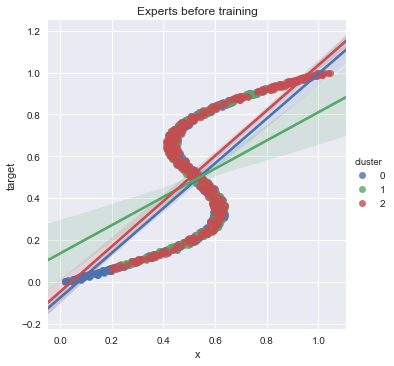

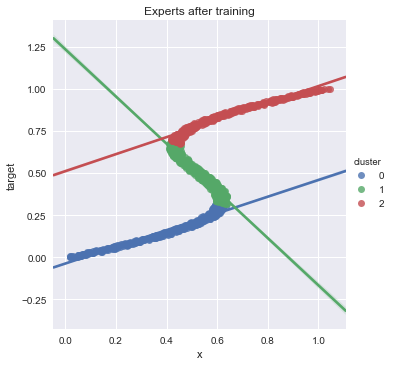

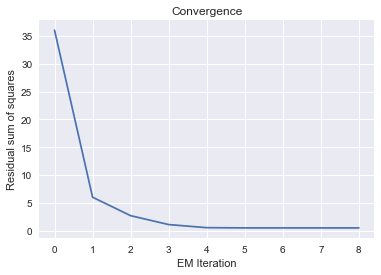

In [300]:
np.random.seed(0)
df['cluster'] = np.random.choice([0, 1, 2], replace=True, size=df.shape[0])
df.loc[df.x <= 0.2, 'cluster'] = 0
df.loc[df.x >= 0.8, 'cluster'] = 2

cluster = df['cluster']

foo = expertMixutre(df, 'target', 'x', n_cluster=3, eps=0.0000001)
foo.initialize_cluster_(df.cluster)
df['cluster'] = foo.cluster
sns.lmplot('x', 'target', data=df, hue='cluster')
plt.title('Experts before training')

foo.train()
df['cluster'] = foo.cluster
sns.lmplot('x', 'target', data=df, hue='cluster')
plt.title("Experts after training")

plt.figure()
plt.plot(foo.rss)
plt.title("Convergence")
plt.xlabel("EM Iteration")
plt.ylabel("Residual sum of squares")

<div class="answer-separator">
------------------------
</div>